# 1) Tutorial de Redes Neuronales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credeintials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 31.8MB/s]


In [ ]:
! unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = loadtxt('/content/diabetes.csv', delimiter=',', skiprows=1)
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
model = Sequential([
    Dense(12, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5534 - loss: 5.6481
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4640 - loss: 2.1432
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5223 - loss: 1.4806
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5389 - loss: 1.2142
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5212 - loss: 1.0242
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5796 - loss: 0.9061
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 0.8305
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.7670
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6278 - loss: 0.7433
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6312 - loss: 0.7415
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6099 - loss: 0.7364
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 0.5206 
Accuracy: 76.56


In [ ]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


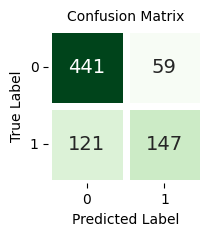

In [ ]:
cm = confusion_matrix(y, rounded)

# Las listas deben de ser con el mismo número de elementos que las clases
df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

# Matriz del mismo tamaño que el número de clases
f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y, rounded))
print("Precision: ", precision_score(y, rounded))
print("Recall: ", recall_score(y, rounded))
print("F1 Score: ", f1_score(y, rounded))

Accuracy:  0.765625
Precision:  0.7135922330097088
Recall:  0.5485074626865671
F1 Score:  0.620253164556962


In [ ]:
print(classification_report(y, rounded))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       500
         1.0       0.71      0.55      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



# 2) Cambios a la red Neuronal.

## 2.1) Nueva Capa

In [ ]:
mejorado = Sequential([
    Dense(12, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),  # Nueva capa añadida
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2.2) Nuevo Learning Rate (disminución del paso)

In [ ]:
# Nuevo learning rate definido (entrenamiento más detallado)
mejorado.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
mejorado.fit(X, y, epochs=150, batch_size=10, verbose=0)

In [ ]:
_, acc_mejorado = mejorado.evaluate(X, y)
print(f"Accuracy (mejorado): {acc_mejorado:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.4843  
Accuracy (mejorado): 0.7786


In [ ]:
pred_mejorado = mejorado.predict(X)
round_mejorado = [round(x[0]) for x in pred_mejorado]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
print("\n--- Métricas Modelo Base ---")
print(f"Precision: {precision_score(y, rounded):.4f}")
print(f"Recall:    {recall_score(y, rounded):.4f}")
print(f"F1 Score:  {f1_score(y, rounded):.4f}\n")
print(classification_report(y, rounded))

print("\n--- Métricas Modelo Mejorado ---")
print(f"Precision: {precision_score(y, round_mejorado):.4f}")
print(f"Recall:    {recall_score(y, round_mejorado):.4f}")
print(f"F1 Score:  {f1_score(y, round_mejorado):.4f}\n")
print(classification_report(y, round_mejorado))


--- Métricas Modelo Base ---
Precision: 0.7136
Recall:    0.5485
F1 Score:  0.6203

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       500
         1.0       0.71      0.55      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768


--- Métricas Modelo Mejorado ---
Precision: 0.7784
Recall:    0.5112
F1 Score:  0.6171

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84       500
         1.0       0.78      0.51      0.62       268

    accuracy                           0.78       768
   macro avg       0.78      0.72      0.73       768
weighted avg       0.78      0.78      0.77       768



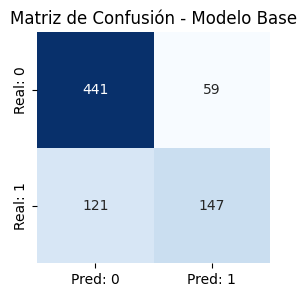

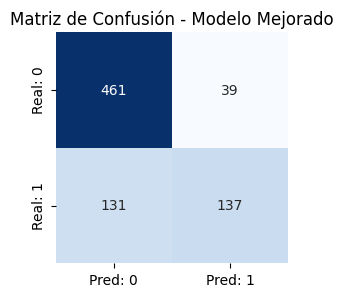

In [ ]:
def matriz(y_true, y_pred, titulo):
    cm = confusion_matrix(y_true, y_pred)
    df = pd.DataFrame(cm, columns=["Pred: 0", "Pred: 1"], index=["Real: 0", "Real: 1"])
    plt.figure(figsize=(3,3))
    sns.heatmap(df, annot=True, cmap="Blues", fmt='d', cbar=False)
    plt.title(titulo)
    plt.show()

matriz(y, rounded, "Matriz de Confusión - Modelo Base")
matriz(y, round_mejorado, "Matriz de Confusión - Modelo Mejorado")

## 2.3) Comparacion de los Modelos

Mi objetivo era mejorar la metrica F1 principalmente porque balancea el modelo al tomar en cuenta la presición de las predicciones, mientras buscaba minimizar la metrica recall para evitar los falsos positivos y falsos negativos. No obstante al ejecutar el modelo mejorado con una capa más y reduciendo el learning rate de forma que cse computaran pasos más pequeños y precisos, la metrica f1 dismunuyo, pero no nesesariamente es negativo por que la presicion para identificar los falsos y positivos correctamente incremento substancialmente en un casi 6%, de forma que tambien se redujo la cantidad total de errores cometidos en donde se obtenia un falso positivo. para un modelo medico esto es positivo ya se minimiza la cantidad de errores dañinos para la salud de los pacientes y aumenta la cantidad de diagnosis correcta, con la desventaja que tambien aumentan los falsos positivos, sin embargo en este contexto, no son errores fatales o dañinos en comparacón a los falsos negativos.